#### Salary prediction with simple linear regression

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


%matplotlib inline

In [2]:
df = pd.read_csv("E:\Data Sciense\DataSet\Salary_Prediction\salary_data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [8]:
set(df['Education Level'])

{"Bachelor's", "Master's", 'PhD'}

In [9]:
set(df['Job Title'])

{'Account Manager',
 'Accountant',
 'Administrative Assistant',
 'Business Analyst',
 'Business Development Manager',
 'Business Intelligence Analyst',
 'CEO',
 'Chief Data Officer',
 'Chief Technology Officer',
 'Content Marketing Manager',
 'Copywriter',
 'Creative Director',
 'Customer Service Manager',
 'Customer Service Rep',
 'Customer Service Representative',
 'Customer Success Manager',
 'Customer Success Rep',
 'Data Analyst',
 'Data Entry Clerk',
 'Data Scientist',
 'Digital Content Producer',
 'Digital Marketing Manager',
 'Director',
 'Director of Business Development',
 'Director of Engineering',
 'Director of Finance',
 'Director of HR',
 'Director of Human Capital',
 'Director of Human Resources',
 'Director of Marketing',
 'Director of Operations',
 'Director of Product Management',
 'Director of Sales',
 'Director of Sales and Marketing',
 'Event Coordinator',
 'Financial Advisor',
 'Financial Analyst',
 'Financial Manager',
 'Graphic Designer',
 'HR Generalist',
 'HR 

In [10]:
job_title_counts = df['Job Title'].value_counts()
job_title_counts.head(10).index

Index(['Director of Marketing', 'Director of Operations',
       'Senior Business Analyst', 'Senior Marketing Analyst',
       'Senior Marketing Manager', 'Junior Business Analyst',
       'Senior Financial Analyst', 'Junior Financial Analyst',
       'Junior Business Development Associate', 'Senior Project Manager'],
      dtype='object', name='Job Title')

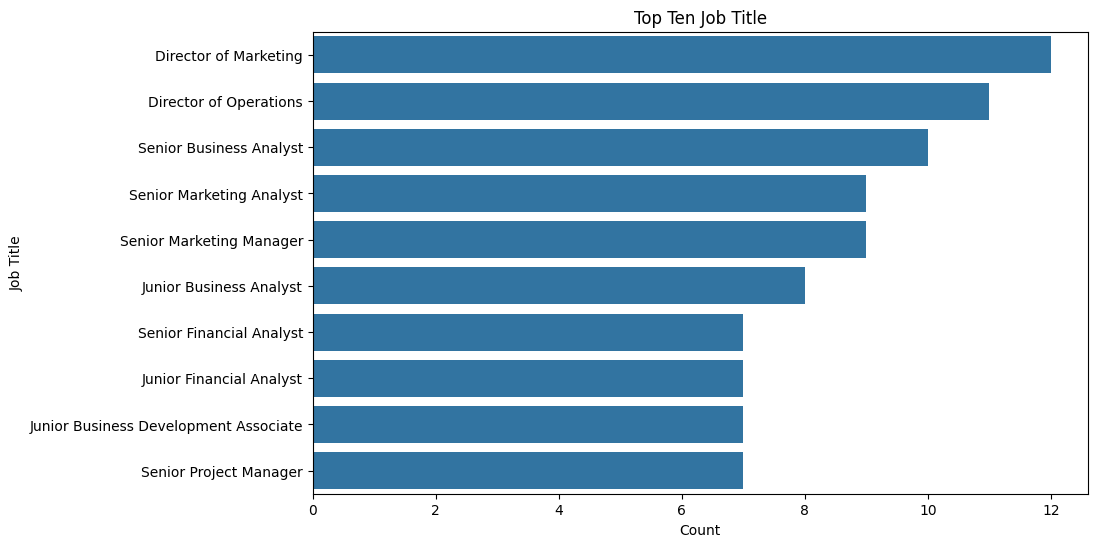

In [11]:
#Count the number of each job title
job_title_counts = df['Job Title'].value_counts()

#Plot the top ten job title
plt.figure(figsize=(10,6))
sns.barplot(x=job_title_counts.head(10), y=job_title_counts.head(10).index, orient='h',)
plt.title('Top Ten Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

<Axes: xlabel='Education Level', ylabel='Salary'>

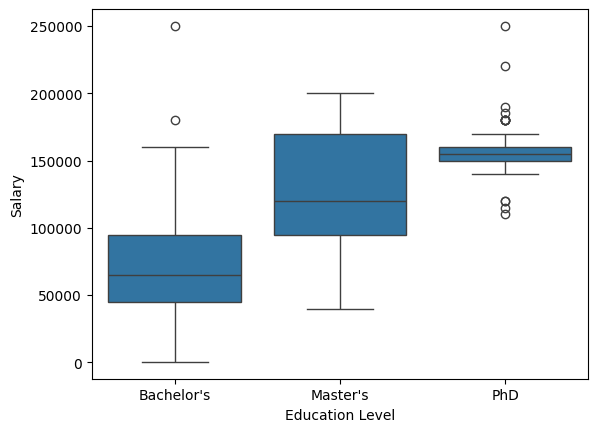

In [12]:
sns.boxplot(data=df, x="Education Level", y="Salary")

In [13]:

df.rename(columns= {'Years of Experience' : 'YearsofExperience'}, inplace=True)

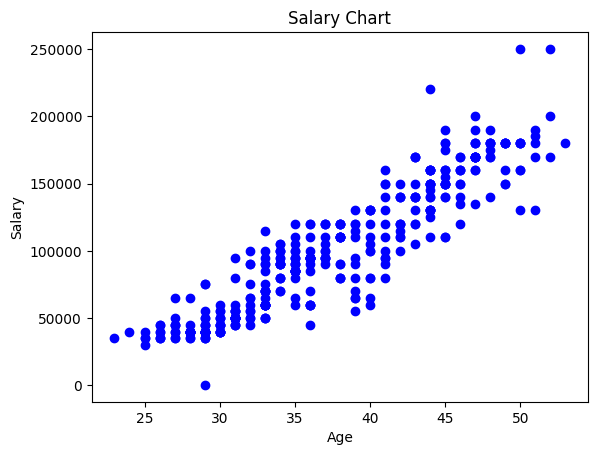

In [14]:
plt.scatter(df.Age, df.Salary, color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary Chart')
plt.show()

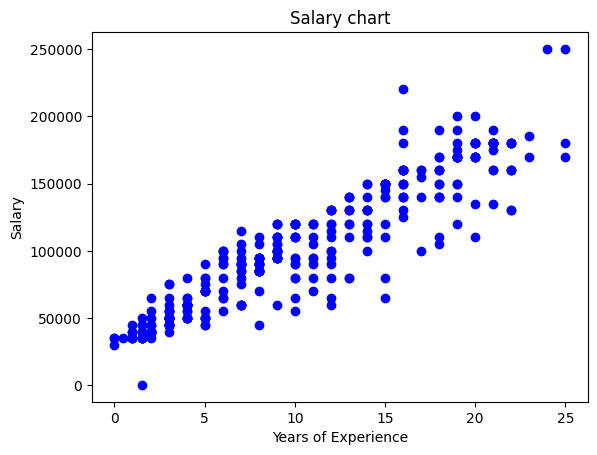

In [15]:
plt.scatter(df.YearsofExperience, df.Salary, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary chart')
plt.show()




## Train Test Split

In [16]:
#X = df.loc[:,['Age']]
#y = df.loc[:,['Salary']]

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

train, test = train_test_split(df, test_size = 0.2, random_state = 0)

print(train.shape)
print(test.shape)

(298, 6)
(75, 6)


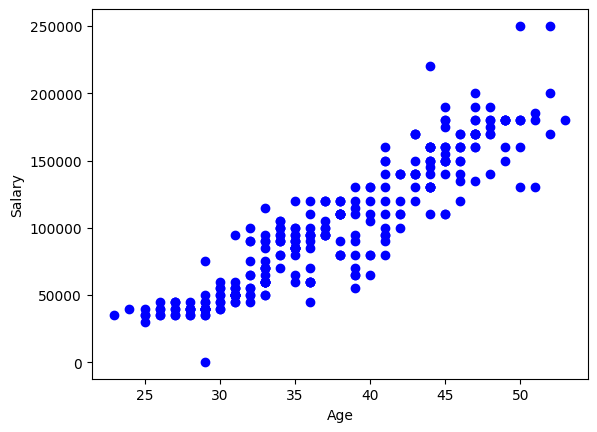

In [25]:
plt.scatter(train.Age, train.Salary, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

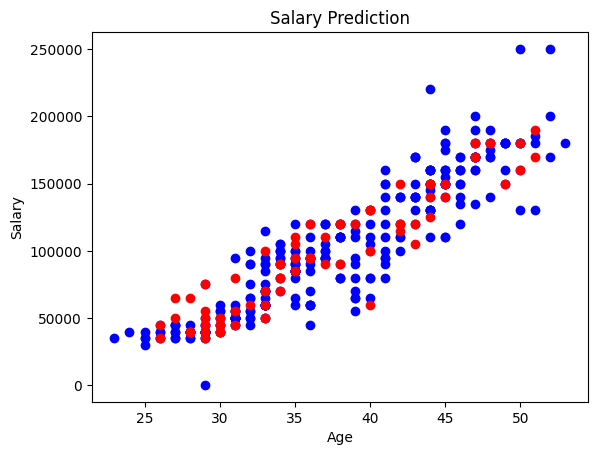

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Age, train.Salary, color='blue') 
ax1.scatter(test.Age, test.Salary, color='red')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [36]:
train_X = train[['Age']]
train_Y = train[['Salary']]

test_X = test[['Age']]
test_Y = test[['Salary']]



### Modeling

#### Using linear regression from sklearn library to model data

In [33]:
simple_regr = linear_model.LinearRegression()

simple_regr.fit(train_X, train_Y)

print("Coeffitionts : ", simple_regr.coef_)
print("Intercept : ", simple_regr.intercept_)




Coeffitionts :  [[6378.23251208]]
Intercept :  [-138246.8237686]


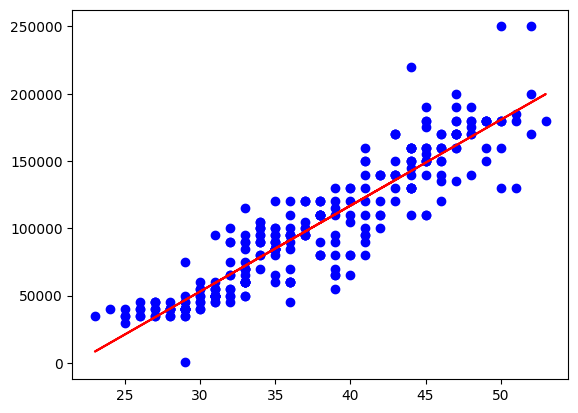

In [35]:
plt.scatter(train.Age, train.Salary, color='blue')
plt.plot(train_X, (simple_regr.coef_ * train_X) + simple_regr.intercept_ , '-r')

In [52]:
prediction_Y = simple_regr.predict(test_X)

print('mean absolute error : %.2f' % np.mean(np.absolute(test_Y - prediction_Y)))
print('R2Score : %.2f' % r2_score(test_Y , prediction_Y))

mean absolute error : 12158.85
R2Score : 0.88
